9167381974248927, 1.0583690987124463]
fibonacci> [0.9708154506437767, 1.0583690987124463]
fibonacci> [0.9708154506437767, 1.024892703862661]
fibonacci> [0.9914163090128755, 1.024892703862661]
fibonacci> [0.9914163090128755, 1.0120171673819742]
fibonacci> [0.9914163090128755, 1.0042918454935623]
fibonacci> [0.9965665236051502, 1.0042918454935623]
fibonacci> found n: 10
fibonacci> [0.6, 1.2]
fibonacci> [0.8291845493562231, 1.2]
fibonacci> [0.8291845493562231, 1.0583690987124463]
fibonacci> [0.9167381974248927, 1.0583690987124463]
fibonacci> [0.9708154506437767, 1.0583690987124463]
fibonacci> [0.9708154506437767, 1.024892703862661]
fibonacci> [0.9914163090128755, 1.024892703862661]
fibonacci> [0.9914163090128755, 1.0120171673819742]
fibonacci> [0.9914163090128755, 1.0042918454935623]
fibonacci> [0.9965665236051502, 1.0042918454935623]
fibonacci> found n: 10
fibonacci> [0.6, 1.2]
fibonacci> [0.8291845493562231, 1.2]
fibonacci> [0.8291845493562231, 1.0583690987124463]
fibonacci> [0.91673819

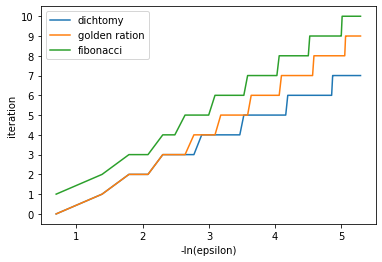

In [1]:
import matplotlib.pyplot as plt
from one_dimensional import dichtomy_method, golden_ratio_method, fibonacci_method
from math import log

def dependency_plot(xlabel, ylabel, results):
    for name, result in results:
        plt.plot([x[0] for x in result], [x[1] for x in result], label=name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def compare(f, a, b):
    def get_results(method, epsilon):
        result, iterations, evaluations = method(f, a, b, epsilon)
        return [f'{result:0.10f}', str(iterations), str(evaluations)]

    print(f'Computing f on [{a}, {b}]')

    methods = [
        ("dichtomy", dichtomy_method),
        ("golden ration", golden_ratio_method),
        ("fibonacci", fibonacci_method)
    ]
    epsilons = [1 / (2 * x) for x in range(1, 100)]

    dependency_plot(
        "-ln(epsilon)",
        "iteration",
        [
            (name, [(-log(epsilon), get_results(function, epsilon)[1]) for epsilon in epsilons])
            for name, function in methods
        ]
    )

compare(lambda x: 100 * ((x - x ** 2) ** 2) + ((1. - x) ** 2), 0.6, 1.2)
